<a href="https://colab.research.google.com/github/PanasRojpattanadecha/bsc_dpdm24/blob/main/Frequent_Patterns_(Association_Rules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import with Path

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/มหาลัยขอนแก่น/3-2/Data prepare & Data Mining/bsc_dpdm24_data'

Mounted at /content/drive


In [ ]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1')

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


## Quiz
ข้อมูลมาจากกี่ประเทศ

In [ ]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

In [ ]:
len(set(data['Country']))

38

# แปลง data "reduce marketbasket" ให้อยู่ในรูปแบบ Transaction Data ด้วย ```groupby.apply(list)```




In [ ]:
transactions = data.groupby('InvoiceNo')['StockCode'].apply(list)
transactions

,StockCode
InvoiceNo,
536365,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
536366,"[22633, 22632]"
536367,"[84879, 22745, 22748, 22749, 22310, 84969, 226..."
536368,"[22960, 22913, 22912, 22914]"
536369,[21756]
...,...
C581484,[23843]
C581490,"[22178, 23144]"
C581499,[M]


# Association Rules

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=66d47c56f54a349b4ec7cd89d9a4118d6e08137055d48fa1a6b0bf385d48b24b
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
frequentItemsets = list(apriori(transactions,min_support = 0.065))
frequentItemsets

[RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)]),
 RelationRecord(items=frozenset({'47566'}), support=0.06586872586872587, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'47566'}), confidence=0.06586872586872587, lift=1.0)]),
 RelationRecord(items=frozenset({'85099B'}), support=0.08243243243243244, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B'}), confidence=0.08243243243243244, lift=1.0)]),
 RelationRecord(items=frozenset({'85123A'}), support=0.08671814671814672, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85123A'}), confidence=0.08671814671814672, lift=1.0)])]

In [ ]:
len(frequentItemsets)

4

In [ ]:
# มีทั้งหมด 4 กฏ

In [ ]:
frequentItemsets[0][0]

frozenset({'22423'})

In [ ]:
frequentItemsets[0]

RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)])

In [ ]:
dir(frequentItemsets[0][0]) # ศึกษาโครงสร้างก้อนที่จะแปลงเป็น list ## dir ใช้ดู properties ของ Itemset

['__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'copy',
 'difference',
 'intersection',
 'isdisjoint',
 'issubset',
 'issuperset',
 'symmetric_difference',
 'union']

In [ ]:
frequentItemsets[0][0].__len__() # Item set นี้ มีขนาด 1 ซึ่งสามารถนำมาเขียนโปรแกรมที่มีขนาด 1 ได้ โดยไม่ต้องเสียเวลาดู

1

In [ ]:
min_sup = 0.03

frequentItemsets = list(apriori(transactions,min_support = min_sup))
for i in frequentItemsets:
    if i[0].__len__()>1:
        print('yes')
        print(i)

# ใช้ดูว่า min support ไหนที่มี item set

yes
RelationRecord(items=frozenset({'22386', '85099B'}), support=0.03216216216216216, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0), OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)])
yes
RelationRecord(items=frozenset({'22699', '22697'}), support=0.03027027027027027, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])


1. RelationRecord(items=frozenset({'22386', '85099B'}),support=0.03216216216216216,

> ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0),

> OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335),

> OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)])

2. RelationRecord(items=frozenset({'22697', '22699'}), support=0.03027027027027027,

> ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22697', '22699'}), confidence=0.03027027027027027, lift=1.0),

> OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947),

> OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])


Query เอาเฉพาะที่เราสนใจ

In [ ]:
set(data[(data['StockCode']=='22386') | (data['StockCode']=='85099B') | (data['StockCode']=='22699') | (data['StockCode']=='22697') ]['Description'])

{'GREEN REGENCY TEACUP AND SAUCER',
 'JUMBO BAG PINK POLKADOT',
 'JUMBO BAG RED RETROSPOT',
 'ROSES REGENCY TEACUP AND SAUCER '}

## Quiz
รหัสสินค้า 22386 และ 85099B เป็นสินค้าอะไร

In [ ]:
set(data[(data['StockCode']=='22386')]['Description'])

{'JUMBO BAG PINK POLKADOT'}

In [ ]:
set(data[(data['StockCode']=='85099B')]['Description'])

{'JUMBO BAG RED RETROSPOT'}

RelationRecord(items=frozenset({'22699', '22697'}), support=0.03027027027027027,

ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0),

OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947),

OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])

In [ ]:
set(data[(data['StockCode']=='22699') | (data['StockCode']=='22697')]['InvoiceNo'])

{'570720',
 'C545724',
 '542862',
 '545719',
 '539594',
 '571713',
 '564191',
 '551160',
 '581219',
 '558116',
 '570187',
 '565917',
 '577020',
 '549016',
 '548673',
 '566581',
 '567140',
 '549052',
 '566193',
 '544205',
 '562202',
 '555147',
 'C567358',
 '545022',
 '552687',
 '565838',
 '539564',
 '559817',
 '573125',
 '545526',
 '548159',
 '543487',
 '558372',
 '537955',
 '571219',
 '543629',
 '541130',
 '540662',
 '544186',
 '574076',
 '578331',
 'C539071',
 '573083',
 '580774',
 '559112',
 'C550808',
 '575607',
 '578031',
 '562219',
 '570872',
 '579711',
 '545411',
 '578993',
 '543530',
 '568333',
 '537335',
 '566170',
 '550899',
 '552257',
 '577355',
 '545667',
 '536804',
 '554036',
 '562955',
 '554040',
 '563951',
 '567673',
 '553718',
 '550307',
 '564817',
 '554974',
 '545428',
 '577029',
 '576672',
 '561926',
 '576381',
 '544305',
 '574368',
 '537754',
 '579885',
 '570701',
 '547712',
 '559800',
 '559173',
 '549295',
 '536862',
 '567663',
 '575939',
 '575138',
 '560634',
 '5662

In [ ]:
data[data['InvoiceNo']=='562950']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
297488,562950,22752,SET 7 BABUSHKA NESTING BOXES,2,08/11/2011 09:56,8.50,15608.0,United Kingdom
297489,562950,22755,SMALL PURPLE BABUSHKA NOTEBOOK,12,08/11/2011 09:56,0.85,15608.0,United Kingdom
297490,562950,22753,SMALL YELLOW BABUSHKA NOTEBOOK,12,08/11/2011 09:56,0.85,15608.0,United Kingdom
297491,562950,22754,SMALL RED BABUSHKA NOTEBOOK,12,08/11/2011 09:56,0.85,15608.0,United Kingdom
297492,562950,22757,LARGE RED BABUSHKA NOTEBOOK,12,08/11/2011 09:56,1.25,15608.0,United Kingdom
297493,562950,22758,LARGE PURPLE BABUSHKA NOTEBOOK,12,08/11/2011 09:56,1.25,15608.0,United Kingdom
297494,562950,22756,LARGE YELLOW BABUSHKA NOTEBOOK,12,08/11/2011 09:56,1.25,15608.0,United Kingdom
297495,562950,23310,BUBBLEGUM RING ASSORTED,36,08/11/2011 09:56,0.42,15608.0,United Kingdom
297496,562950,23280,FOLDING BUTTERFLY MIRROR HOT PINK,12,08/11/2011 09:56,0.83,15608.0,United Kingdom
297497,562950,22383,LUNCH BAG SUKI DESIGN,10,08/11/2011 09:56,1.65,15608.0,United Kingdom


#HW3จาก Data Reduced_Marketbasket
1. วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป
2. คิดเอง

##Clean data

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


### ดรอป missing ใน Description และ CustomerID

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# prompt: Description	กำจัดค่า nan

# Drop rows with NaN values in the 'Description' column
data = data.dropna(subset=['Description'])

In [ ]:
# prompt: # prompt: ดรอป Unknownและ missing ใน Continent และ CustomerID

# Drop rows where 'Continent' is 'Unknown' or 'CustomerID' is missing
data = data.dropna(subset=['CustomerID'])

In [ ]:
# prompt: ดูmissing ในแต่ละ colum
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


###แบ่ง วัน เดือน ปี

In [ ]:
# prompt: ในตาราง InvoiceDate แยก วัน เดือนปี มาสร้าง colum ใหม่

# Convert 'InvoiceDate' to datetime objects
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract day, month, and year
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011


In [ ]:
set(data['Day'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}

In [ ]:
set(data['Month'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [ ]:
set(data['Year'])

{2010, 2011}

###  จากประเทศ ทำเป็น ทวีป

In [ ]:
# prompt: จาก Country แบ่งเป็นทวีป

# Assuming 'data' DataFrame is already loaded as in the provided code.
# Create a dictionary to map countries to continents.
# This is a simplified example and might need adjustments for more accurate continent assignment.
country_to_continent = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Australia': 'Oceania',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Japan': 'Asia',
    'Iceland': 'Europe',
    'Channel Islands': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Israel': 'Asia',
    'Finland': 'Europe',
    'Bahrain': 'Asia',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Lebanon': 'Asia',
    'United Arab Emirates': 'Asia',
    'Saudi Arabia': 'Asia',
    'Canada': 'North America',
    'Unspecified': 'Unknown',
    'Brazil': 'South America',
    'USA': 'North America',
    'European Community': 'Europe',
    'Malta': 'Europe',
    'RSA': 'Africa'
}


# Add a 'Continent' column to the DataFrame
data['Continent'] = data['Country'].map(country_to_continent)

In [ ]:
continent_counts = data['Continent'].value_counts()
continent_counts

,count
Continent,
Europe,403787
Oceania,1259
Asia,977
North America,442
Unknown,244
Africa,58
South America,32


In [ ]:
data = data[data['Continent'] != 'Unknown']

In [ ]:
continent_counts = data['Continent'].value_counts()
continent_counts

,count
Continent,
Europe,403787
Oceania,1259
Asia,977
North America,442
Africa,58
South America,32


In [ ]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom'}

In [ ]:
# prompt: นับจำนวนประเทศ

len(set(data['Country']))

36

###ราคาสินค้า

In [ ]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']

<ipython-input-21-2a5be58c92ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['UnitPrice'] * data['Quantity']


In [ ]:
avg_spending_per_continent = data.groupby(['Continent', 'CustomerID'])['TotalPrice'].sum().reset_index().groupby('Continent')['TotalPrice'].mean()

In [ ]:
avg_spending_per_continent

,TotalPrice
Continent,
Africa,1002.310000
Asia,2933.210000
Europe,1869.392647
North America,674.662500
Oceania,15230.807778
South America,1143.600000


In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,Europe,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,Europe,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,Europe,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,Europe,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,Europe,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,Europe,16.60


In [ ]:
transactions_lol = data.groupby('CustomerID')['StockCode'].apply(list)
transactions_lol

,StockCode
CustomerID,
12346.0,"[23166, 23166]"
12347.0,"[85116, 22375, 71477, 22492, 22771, 22772, 227..."
12348.0,"[84992, 22951, 84991, 84991, 21213, 21213, 226..."
12349.0,"[23112, 23460, 21564, 21411, 21563, 22131, 221..."
12350.0,"[21908, 22412, 79066K, 79191C, 22348, 84086C, ..."
...,...
18280.0,"[82484, 22180, 22467, 22725, 22727, 22495, 223..."
18281.0,"[22037, 22716, 22028, 23007, 23008, 23209, 22467]"
18282.0,"[21270, 23187, 23295, 22089, 21108, 21109, 224..."


In [ ]:
# prompt: นับจำนวน CustomerID แต่ละทวีป

# Count CustomerID for each continent
customer_counts_per_continent = data.groupby('Continent')['CustomerID'].nunique()
customer_counts_per_continent

,CustomerID
Continent,
Africa,1
Asia,19
Europe,4331
North America,8
Oceania,9
South America,1


##1. วิเคราะห์พฤติกรรมผู้บริโภค (groupby customer id) แต่ละทวีป

###ทวีป Europe

In [ ]:
# prompt: เอาเฉพาะข้อมูล Europe มา

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Filter data for Europe
europe_data = data[data['Continent'] == 'Europe']

# Now 'europe_data' contains only the rows where the 'Continent' is 'Europe'
europe_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,Europe,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,2010,Europe,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,9,12,2011,Europe,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,9,12,2011,Europe,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,9,12,2011,Europe,16.60


In [ ]:
transactions_europe = europe_data.groupby('CustomerID')['StockCode'].apply(list)

In [ ]:
min_sup = 0.073

frequentItemsets_o  = list(apriori(transactions_europe,min_support = min_sup))
for i in frequentItemsets_o :
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22910', '22086'}), support=0.0750404063726622, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22910', '22086'}), confidence=0.0750404063726622, lift=1.0), OrderedStatistic(items_base=frozenset({'22086'}), items_add=frozenset({'22910'}), confidence=0.530179445350734, lift=4.916931858274152), OrderedStatistic(items_base=frozenset({'22910'}), items_add=frozenset({'22086'}), confidence=0.6959314775160599, lift=4.916931858274152)])
yes
RelationRecord(items=frozenset({'22699', '22423'}), support=0.07319325790810437, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22423'}), confidence=0.07319325790810437, lift=1.0), OrderedStatistic(items_base=frozenset({'22423'}), items_add=frozenset({'22699'}), confidence=0.36353211009174313, lift=3.748708497160332), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22423'}), confidence=0.7547619047619049, lift=3.7487084

In [ ]:
set(data[(data['StockCode']=='22086') |  (data['StockCode']=='22910')  | (data['StockCode']=='22699') |  (data['StockCode']=='22697')]['Description'])

{'GREEN REGENCY TEACUP AND SAUCER',
 "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'PAPER CHAIN KIT VINTAGE CHRISTMAS',
 'ROSES REGENCY TEACUP AND SAUCER '}

In [ ]:
set(data[(data['StockCode']=='22423')]['Description'])

{'REGENCY CAKESTAND 3 TIER', 'damages', 'faulty'}

###ทวีป Asia

In [ ]:
# Filter data for Asia
Asia_data = data[data['Continent'] == 'Asia']

# Now 'Asia_data' contains only the rows where the 'Continent' is 'Asia'
Asia_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2010-12-05 15:46:00,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2.55,12763.0,Japan,5,12,2010,Asia,15.30
2010-12-05 15:46:00,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,0.42,12763.0,Japan,5,12,2010,Asia,5.04
2010-12-05 15:46:00,537218,22716,CARD CIRCUS PARADE,12,0.42,12763.0,Japan,5,12,2010,Asia,5.04
2010-12-05 15:46:00,537218,22983,CARD BILLBOARD FONT,12,0.42,12763.0,Japan,5,12,2010,Asia,5.04
2010-12-05 15:46:00,537218,22030,SWALLOWS GREETING CARD,12,0.42,12763.0,Japan,5,12,2010,Asia,5.04
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-06 11:40:00,C580832,21731,RED TOADSTOOL LED NIGHT LIGHT,-2,1.45,12753.0,Japan,6,12,2011,Asia,-2.90
2011-12-06 11:40:00,C580832,23480,MINI LIGHTS WOODLAND MUSHROOMS,-15,3.29,12753.0,Japan,6,12,2011,Asia,-49.35
2011-12-06 11:40:00,C580832,22466,FAIRY TALE COTTAGE NIGHT LIGHT,-17,1.65,12753.0,Japan,6,12,2011,Asia,-28.05


In [ ]:
transactions_Asia = Asia_data.groupby('CustomerID')['StockCode'].apply(list)

In [ ]:
min_sup = 0.15

frequentItemsets_o  = list(apriori(transactions_Asia,min_support = min_sup))
for i in frequentItemsets_o :
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'20724', '23240'}), support=0.15789473684210525, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724', '23240'}), confidence=0.15789473684210525, lift=1.0), OrderedStatistic(items_base=frozenset({'20724'}), items_add=frozenset({'23240'}), confidence=1.0, lift=3.8000000000000003), OrderedStatistic(items_base=frozenset({'23240'}), items_add=frozenset({'20724'}), confidence=0.6, lift=3.8000000000000003)])
yes
RelationRecord(items=frozenset({'21078', '21080'}), support=0.15789473684210525, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'21078', '21080'}), confidence=0.15789473684210525, lift=1.0), OrderedStatistic(items_base=frozenset({'21078'}), items_add=frozenset({'21080'}), confidence=1.0, lift=4.75), OrderedStatistic(items_base=frozenset({'21080'}), items_add=frozenset({'21078'}), confidence=0.75, lift=4.75)])
yes
RelationRecord(items=frozenset({'21210', '21080'}), support=0.157

In [ ]:
set(data[(data['StockCode']=='22697') |  (data['StockCode']=='22699')]['Description'])

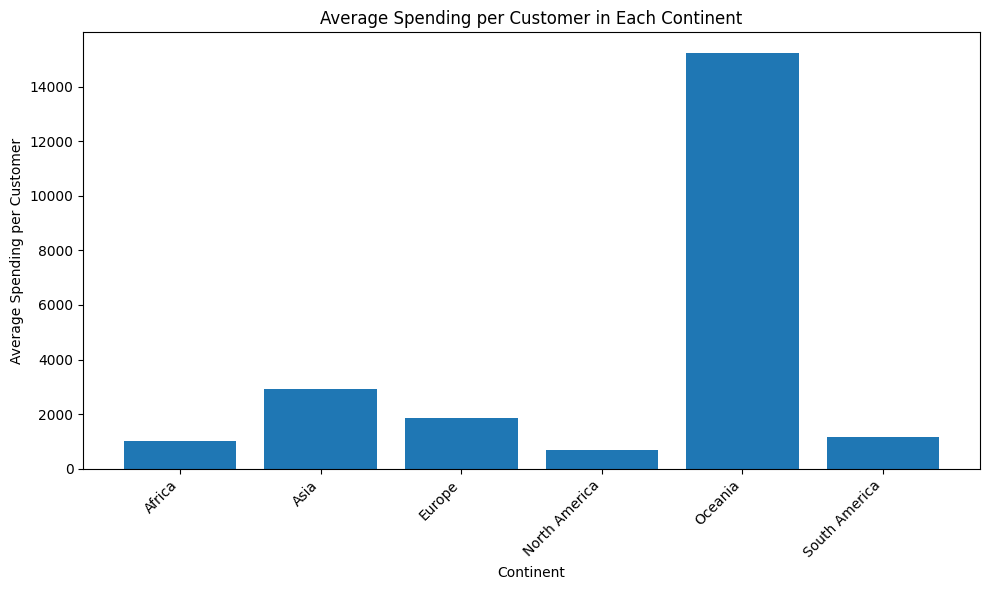

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_spending_per_continent.index, avg_spending_per_continent.values)
plt.xlabel("Continent")
plt.ylabel("Average Spending per Customer")
plt.title("Average Spending per Customer in Each Continent")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

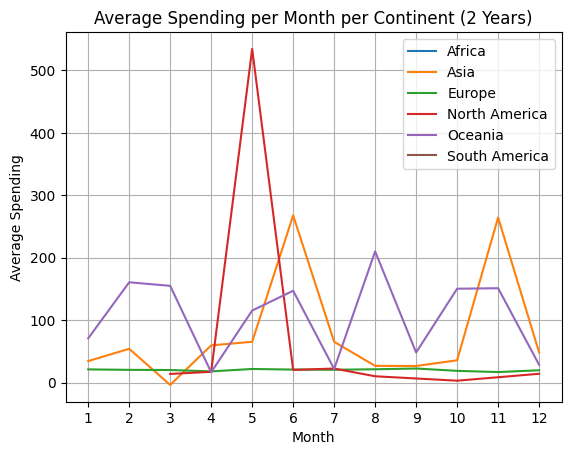

In [ ]:
# prompt: ทำ time seris Y Average Spending X เดือนตั้งแต่1-12 2ปีมาเฉลี่ยปีกัน ในแต่ละทวีป

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Group data by continent, month, and year, then calculate the average spending
average_spending_by_month_year = data.groupby(['Continent', 'Month', 'Year'])['TotalPrice'].mean().reset_index()

# Calculate the average spending for each month across all years for each continent
average_spending_by_month = average_spending_by_month_year.groupby(['Continent', 'Month'])['TotalPrice'].mean().reset_index()

# Plotting
import matplotlib.pyplot as plt

continents = average_spending_by_month['Continent'].unique()

for continent in continents:
  continent_data = average_spending_by_month[average_spending_by_month['Continent'] == continent]
  plt.plot(continent_data['Month'], continent_data['TotalPrice'], label=continent)

plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.title('Average Spending per Month per Continent (2 Years)')
plt.legend()
plt.xticks(range(1,13)) # Ensure all month ticks are displayed
plt.grid(True)
plt.show()

## 2. วิเคราะห์ความสัมพันธ์   Association Rules ของผู้บริโภค (groupby customer id) แต่ฤดูกาลของทวีป Europe

###เอาเฉพาะข้อมูล Europe

In [ ]:
# prompt: เอาเฉพาะข้อมูล Europe มา

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Filter data for Europe
europe_data = data[data['Continent'] == 'Europe']

# Now 'europe_data' contains only the rows where the 'Continent' is 'Europe'
europe_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,Europe
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,Europe
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,Europe
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,Europe
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,Europe


###ฤดูใบไม้ผลิ

In [ ]:
data_spring = europe_data[(europe_data['Month'] >= 3) & (europe_data['Month'] <= 5)]
data_spring

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2011-03-01 08:30:00,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,7.95,14620.0,United Kingdom,1,3,2011,Europe,15.90
2011-03-01 08:30:00,545220,48194,DOORMAT HEARTS,2,7.95,14620.0,United Kingdom,1,3,2011,Europe,15.90
2011-03-01 08:30:00,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,1.65,14620.0,United Kingdom,1,3,2011,Europe,19.80
2011-03-01 08:30:00,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,4.95,14620.0,United Kingdom,1,3,2011,Europe,14.85
2011-03-01 08:30:00,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3.75,14620.0,United Kingdom,1,3,2011,Europe,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-31 15:41:00,555147,84707A,SILVER JEWELLED MIRROR TRINKET TRAY,2,9.95,13505.0,Switzerland,31,5,2011,Europe,19.90
2011-05-31 15:41:00,555147,84711A,SILVER OVAL SHAPE TRINKET BOX,2,9.95,13505.0,Switzerland,31,5,2011,Europe,19.90
2011-05-31 15:41:00,555147,84711B,PINK OVAL SHAPE TRINKET BOX,2,9.95,13505.0,Switzerland,31,5,2011,Europe,19.90


In [ ]:
transactions_one = data_spring.groupby('CustomerID')['StockCode'].apply(list)
transactions_one

,StockCode
CustomerID,
12347.0,"[22376, 22374, 22371, 22375, 20665, 23076, 217..."
12348.0,"[23077, 23078, 23076, 22437, POST]"
12352.0,"[POST, 22654, 84050, 22138, 22844, M, M, M, M,..."
12354.0,"[23201, 23204, 23205, 23254, 23255, 23256, 219..."
12356.0,"[84991, 21212, 22938, 21124, 84457, 22857, 211..."
...,...
18272.0,"[20754, 21563, 71459, 22557, 22979, 22980, 207..."
18273.0,[79302M]
18280.0,"[82484, 22180, 22467, 22725, 22727, 22495, 223..."


In [ ]:
min_sup = 0.07

frequentItemsets_one  = list(apriori(transactions_one,min_support = min_sup))
for i in frequentItemsets_one :
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22699', '22697'}), support=0.07075236671649228, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.07075236671649228, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.8658536585365855, lift=9.548177432323774), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7802197802197802, lift=9.548177432323774)])


In [ ]:
set(data[(data['StockCode']=='22697') |  (data['StockCode']=='22699')]['Description'])

{'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}

### ฤดูร้อน

In [ ]:
data_summer = europe_data[(europe_data['Month'] >= 6) & (europe_data['Month'] <= 8)]
data_summer

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2011-06-01 07:37:00,555156,23299,FOOD COVER WITH BEADS SET 2,6,3.75,15643.0,United Kingdom,1,6,2011,Europe,22.50
2011-06-01 07:37:00,555156,22847,BREAD BIN DINER STYLE IVORY,1,16.95,15643.0,United Kingdom,1,6,2011,Europe,16.95
2011-06-01 07:38:00,555157,23075,PARLOUR CERAMIC WALL HOOK,16,4.15,15643.0,United Kingdom,1,6,2011,Europe,66.40
2011-06-01 07:38:00,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,5.45,15643.0,United Kingdom,1,6,2011,Europe,32.70
2011-06-01 07:38:00,555157,22423,REGENCY CAKESTAND 3 TIER,4,12.75,15643.0,United Kingdom,1,6,2011,Europe,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-31 17:31:00,C565077,23196,VINTAGE LEAF MAGNETIC NOTEPAD,-3,1.45,17451.0,United Kingdom,31,8,2011,Europe,-4.35
2011-08-31 17:31:00,C565077,22189,CREAM HEART CARD HOLDER,-1,3.95,17451.0,United Kingdom,31,8,2011,Europe,-3.95
2011-08-31 17:31:00,C565077,23239,SET OF 4 KNICK KNACK TINS POPPIES,-1,4.15,17451.0,United Kingdom,31,8,2011,Europe,-4.15


In [ ]:
transactions_two = data_summer.groupby('CustomerID')['StockCode'].apply(list)
transactions_two

,StockCode
CustomerID,
12347.0,"[23084, 23162, 23171, 23172, 23170, 23173, 231..."
12358.0,"[15060B, 22059, 37449, 37447, 48185, 15056P, 1..."
12359.0,"[85099C, 22993, 23050, 23049, 23051, 23052, 23..."
12360.0,"[23199, 22385, 22742, 21578, 21579, 21576, 215..."
12362.0,"[23245, 22423, 22776, 22799, 21671, 22509, 209..."
...,...
18268.0,"[84968A, 84968A]"
18272.0,"[23306, 23240, 23298, 23307, 23165, 23166, 231..."
18281.0,"[22037, 22716, 22028, 23007, 23008, 23209, 22467]"


In [ ]:
min_sup = 0.077

frequentItemsetsC_and_N = list(apriori(transactions_two,min_support = min_sup))
for i in frequentItemsetsC_and_N:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22384', '20725'}), support=0.07789580171977745, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22384', '20725'}), confidence=0.07789580171977745, lift=1.0), OrderedStatistic(items_base=frozenset({'20725'}), items_add=frozenset({'22384'}), confidence=0.5900383141762453, lift=4.942820962400157), OrderedStatistic(items_base=frozenset({'22384'}), items_add=frozenset({'20725'}), confidence=0.652542372881356, lift=4.942820962400156)])
yes
RelationRecord(items=frozenset({'23298', '47566'}), support=0.07890743550834597, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'23298', '47566'}), confidence=0.07890743550834597, lift=1.0), OrderedStatistic(items_base=frozenset({'23298'}), items_add=frozenset({'47566'}), confidence=0.48749999999999993, lift=2.9473623853211004), OrderedStatistic(items_base=frozenset({'47566'}), items_add=frozenset({'23298'}), confidence=0.47706422018348615, lift=2.947

In [ ]:
set(data[(data['StockCode']=='22384') | (data['StockCode']=='47566')]['Description'])

{'LUNCH BAG PINK POLKADOT', 'PARTY BUNTING'}

In [ ]:
set(data[(data['StockCode']=='20725')]['Description'])

{'LUNCH BAG RED RETROSPOT', 'LUNCH BAG RED SPOTTY'}

In [ ]:
set(data[(data['StockCode']=='23298')]['Description'])

{'BUNTING , SPOTTY ', 'SPOTTY BUNTING'}

###ฤดูใบไม้ร่วง

In [ ]:
data_autumn = europe_data[(europe_data['Month'] >= 9) & (europe_data['Month'] <= 11)]
data_autumn

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2011-09-01 08:25:00,565080,20677,PINK POLKADOT BOWL,8,1.25,13509.0,United Kingdom,1,9,2011,Europe,10.00
2011-09-01 08:25:00,565080,22128,PARTY CONES CANDY ASSORTED,24,1.25,13509.0,United Kingdom,1,9,2011,Europe,30.00
2011-09-01 09:15:00,565082,22423,REGENCY CAKESTAND 3 TIER,2,12.75,13305.0,United Kingdom,1,9,2011,Europe,25.50
2011-09-01 09:15:00,565082,15060B,FAIRY CAKE DESIGN UMBRELLA,8,3.75,13305.0,United Kingdom,1,9,2011,Europe,30.00
2011-09-01 09:15:00,565082,23245,SET OF 3 REGENCY CAKE TINS,4,4.95,13305.0,United Kingdom,1,9,2011,Europe,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-11-30 17:39:00,C579886,22197,POPCORN HOLDER,-1,0.85,15676.0,United Kingdom,30,11,2011,Europe,-0.85
2011-11-30 17:39:00,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,3.29,15676.0,United Kingdom,30,11,2011,Europe,-3.29
2011-11-30 17:42:00,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,1.25,16717.0,United Kingdom,30,11,2011,Europe,-1.25


In [ ]:
transactions_three = data_autumn.groupby('CustomerID')['StockCode'].apply(list)
transactions_three

,StockCode
CustomerID,
12347.0,"[23480, 21265, 21636, 22372, 22375, 22371, 223..."
12348.0,"[23077, 23078, POST]"
12349.0,"[23112, 23460, 21564, 21411, 21563, 22131, 221..."
12352.0,"[22801, 23198, 22980, 23245, 21314, 22692, 229..."
12356.0,"[22423, 21843]"
...,...
18276.0,"[23085, 22565, 22568, 20972, 23076, 23077, 234..."
18277.0,"[15056P, 20679, 22578, 20724, 22465, 23323, 84..."
18278.0,"[22114, 23301, 23355, 22111, 20914, 22727, 234..."


In [ ]:
min_sup = 0.077

frequentItemsetsC_and_N = list(apriori(transactions_three,min_support = min_sup))
for i in frequentItemsetsC_and_N:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22910', '22086'}), support=0.08686514886164623, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22910', '22086'}), confidence=0.08686514886164623, lift=1.0), OrderedStatistic(items_base=frozenset({'22086'}), items_add=frozenset({'22910'}), confidence=0.5092402464065708, lift=4.095439164762704), OrderedStatistic(items_base=frozenset({'22910'}), items_add=frozenset({'22086'}), confidence=0.6985915492957746, lift=4.095439164762703)])
yes
RelationRecord(items=frozenset({'22578', '22577'}), support=0.07915936952714536, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22578', '22577'}), confidence=0.07915936952714536, lift=1.0), OrderedStatistic(items_base=frozenset({'22577'}), items_add=frozenset({'22578'}), confidence=0.7847222222222223, lift=7.672540905631659), OrderedStatistic(items_base=frozenset({'22578'}), items_add=frozenset({'22577'}), confidence=0.773972602739726, lift=7.672540

In [ ]:
set(data[(data['StockCode']=='22910') | (data['StockCode']=='22086') ]['Description'])

{"PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS'}

In [ ]:
set(data[(data['StockCode']=='22577')]['Description'])

{'WOODEN HEART CHRISTMAS SCANDINAVIAN'}

In [ ]:
set(data[(data['StockCode']=='22578')]['Description'])

{'WOODEN STAR CHRISTMAS SCANDINAVIAN'}

###ฤดูหนาว

In [ ]:
data_winter = europe_data[(europe_data['Month'] <= 2) | (europe_data['Month'] == 12)]
data_winter

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Year,Continent,TotalPrice
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,Europe,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,2010,Europe,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,2010,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,9,12,2011,Europe,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,9,12,2011,Europe,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,9,12,2011,Europe,16.60


In [ ]:
transactions_four = data_winter.groupby('CustomerID')['StockCode'].apply(list)
transactions_four

,StockCode
CustomerID,
12346.0,"[23166, 23166]"
12347.0,"[85116, 22375, 71477, 22492, 22771, 22772, 227..."
12348.0,"[84992, 22951, 84991, 84991, 21213, 21213, 226..."
12350.0,"[21908, 22412, 79066K, 79191C, 22348, 84086C, ..."
12352.0,"[21380, 22064, 21232, 22646, 22779, 22423, 226..."
...,...
18272.0,"[22075, 22074, 22076, 23358, 72799C, 72799E, 2..."
18273.0,[79302M]
18277.0,[22423]


In [ ]:
min_sup = 0.07

frequentItemsetsC_and_N = list(apriori(transactions_four,min_support = min_sup))
for i in frequentItemsetsC_and_N:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'22470', '22469'}), support=0.07583859990277103, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22470', '22469'}), confidence=0.07583859990277103, lift=1.0), OrderedStatistic(items_base=frozenset({'22469'}), items_add=frozenset({'22470'}), confidence=0.5799256505576209, lift=5.301809169764561), OrderedStatistic(items_base=frozenset({'22470'}), items_add=frozenset({'22469'}), confidence=0.6933333333333334, lift=5.30180916976456)])


In [ ]:
set(data[(data['StockCode']=='22470') | (data['StockCode']=='22469')]['Description'])

{'HEART OF WICKER LARGE', 'HEART OF WICKER SMALL'}